In [1]:
access_pr_file = 'data/pr_Amon_ACCESS1-3_historical_r1i1p1_200101-200512.nc'

In [2]:
import iris
import iris.coord_categorisation
import iris.plot as iplt
import matplotlib.pyplot as plt
import numpy
import cmocean
import warnings


In [3]:
warnings.filterwarnings('ignore')

In [4]:
cube = iris.load_cube(access_pr_file, 'precipitation_flux')

In [5]:
type(cube)

iris.cube.Cube

In [6]:
print(cube)

precipitation_flux / (kg m-2 s-1)   (time: 60; latitude: 145; longitude: 192)
     Dimension coordinates:
          time                           x             -               -
          latitude                       -             x               -
          longitude                      -             -               x
     Attributes:
          CDI: Climate Data Interface version 1.7.1 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.7.1 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.4
          NCO: 4.7.0
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_atmos_fx_ACCESS1-3_historical_r0i0p0.nc...
          branch_time: 90945.0
          cmor_version: 2.8.0
          comment: at surface; includes both liquid and solid phases from all types of clouds...
          contact: The ACCESS wiki: http://wiki.csiro.au/confluence/display/ACCESS/Home. Contact...
          creation_date: 2012-02-08T06:45:

In [7]:
type(cube.data)

numpy.ma.core.MaskedArray

In [8]:
cube.data = cube.data * 86400
cube.units = 'mm/day'

print(cube.data)

[[[0.1935601  0.1935601  0.1935601  ... 0.19356462 0.19356462 0.19356462]
  [0.1447533  0.14544508 0.14426884 ... 0.14376532 0.14384298 0.14420281]
  [0.11191487 0.10959744 0.10702134 ... 0.1180298  0.11630877 0.11427277]
  ...
  [0.33918399 0.33390013 0.31335705 ... 0.36313155 0.36120814 0.35369975]
  [0.23419948 0.22458103 0.21769808 ... 0.24603607 0.24342618 0.23943994]
  [0.19399691 0.19399691 0.19399691 ... 0.19399691 0.19399691 0.19399691]]

 [[0.40744387 0.40744387 0.40744387 ... 0.40733386 0.40733386 0.40733386]
  [0.3576763  0.35527941 0.35226864 ... 0.36329205 0.36280854 0.36040544]
  [0.27519296 0.26928485 0.26420658 ... 0.27899878 0.27950886 0.27742379]
  ...
  [0.55938242 0.56279626 0.56429294 ... 0.55045986 0.55220347 0.55605474]
  [0.54189652 0.54576672 0.54205526 ... 0.53945924 0.53705515 0.53841007]
  [0.54872614 0.54872614 0.54872614 ... 0.54872614 0.54872614 0.54872614]]

 [[0.66740171 0.66740171 0.66740171 ... 0.66730002 0.66730002 0.66730002]
  [0.61190933 0.607646

In [9]:

iris.coord_categorisation.add_month(cube, 'time')
print(cube)

precipitation_flux / (mm/day)       (time: 60; latitude: 145; longitude: 192)
     Dimension coordinates:
          time                           x             -               -
          latitude                       -             x               -
          longitude                      -             -               x
     Auxiliary coordinates:
          month                          x             -               -
     Attributes:
          CDI: Climate Data Interface version 1.7.1 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.7.1 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.4
          NCO: 4.7.0
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_atmos_fx_ACCESS1-3_historical_r0i0p0.nc...
          branch_time: 90945.0
          cmor_version: 2.8.0
          comment: at surface; includes both liquid and solid phases from all types of clouds...
          contact: The ACCESS wiki: http:

In [10]:
mon = cube.extract(iris.Constraint(month ='Jun'))
mon_clim = cube.collapsed('time', iris.analysis.MEAN)
print(mon_clim)

precipitation_flux / (mm/day)       (latitude: 145; longitude: 192)
     Dimension coordinates:
          latitude                           x               -
          longitude                          -               x
     Scalar coordinates:
          month: Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec|Jan|Feb|Mar|Apr|May|Ju...
          time: 2003-07-03 00:00:00, bound=(2001-01-01 00:00:00, 2006-01-01 00:00:00)
     Attributes:
          CDI: Climate Data Interface version 1.7.1 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.7.1 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.4
          NCO: 4.7.0
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_atmos_fx_ACCESS1-3_historical_r0i0p0.nc...
          branch_time: 90945.0
          cmor_version: 2.8.0
          comment: at surface; includes both liquid and solid phases from all types of clouds...
          contact: The ACCESS wiki: http://

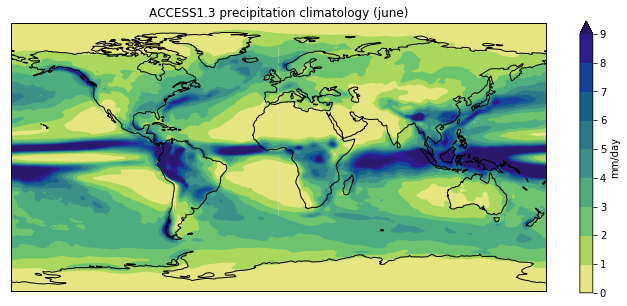

In [11]:
fig = plt.figure(figsize=[12,5])
iplt.contourf(mon_clim, cmap=cmocean.cm.haline_r, levels=numpy.arange(0, 10), extend='max')
plt.gca().coastlines()
cbar = plt.colorbar()
cbar.set_label(str(cube.units))
plt.title("%s precipitation climatology (june)" %(mon_clim.attributes['model_id']))
plt.show()

In [12]:
def plot_pr_climatology(pr_file, month, gridlines=False):
    """Plot the precipitation climatology.
    
    Args:
      pr_file (str): Precipitation data file
      month (str): Month (3 letter abbreviation, e.g. Jun)
      gridlines (bool): Select whether to plot gridlines
    
    """

    cube = iris.load_cube(pr_file, 'precipitation_flux')
    iris.coord_categorisation.add_month(cube, 'time')
    cube = cube.extract(iris.Constraint(month=month))

    cube.data = cube.data * 86400
    cube.units = 'mm/day'

    clim = cube.collapsed('time', iris.analysis.MEAN)

    fig = plt.figure(figsize=[12,5])
    iplt.contourf(clim, cmap=cmocean.cm.haline_r, 
                  levels=numpy.arange(0, 10),
                  extend='max')
    plt.gca().coastlines()
    if gridlines:
        plt.gca().gridlines()
    cbar = plt.colorbar()
    cbar.set_label(str(cube.units))

    title = '%s precipitation climatology (%s)' %(cube.attributes['model_id'], month)
    plt.title(title)

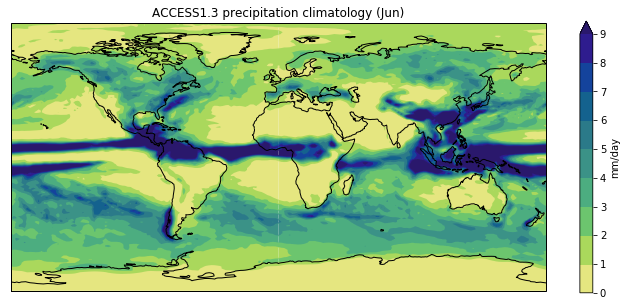

In [13]:
import iris
import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.coord_categorisation
import cmocean
import numpy

access_pr_file = 'data/pr_Amon_ACCESS1-3_historical_r1i1p1_200101-200512.nc'

cube = iris.load_cube(access_pr_file, 'precipitation_flux')
iris.coord_categorisation.add_month(cube, 'time')
cube = cube.extract(iris.Constraint(month='Jun'))

cube.data = cube.data * 86400
cube.units = 'mm/day'

clim = cube.collapsed('time', iris.analysis.MEAN)

fig = plt.figure(figsize=[12,5])
iplt.contourf(clim, cmap=cmocean.cm.haline_r, 
              levels=numpy.arange(0, 10), extend='max')
plt.gca().coastlines()
cbar = plt.colorbar()
cbar.set_label(str(cube.units))

title = '%s precipitation climatology (Jun)' %(cube.attributes['model_id'])
plt.title(title)

plt.show()


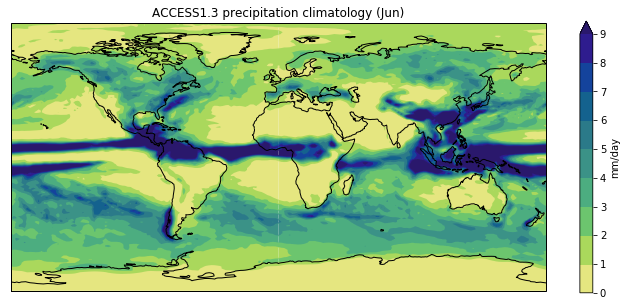

In [14]:

plot_pr_climatology('data/pr_Amon_ACCESS1-3_historical_r1i1p1_200101-200512.nc', 'Jun')
plt.show()